In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [43]:
df = pd.read_csv('Fish.csv')

In [44]:
df.head(20)

Height   Width  Weight
0   11.5200  4.0200   242.0
1   12.4800  4.3056   290.0
2   12.3778  4.6961   340.0
3   12.7300  4.4555   363.0
4   12.4440  5.1340   430.0
5   13.6024  4.9274   450.0
6   14.1795  5.2785   500.0
7   12.6700  4.6900   390.0
8   14.0049  4.8438   450.0
9   14.2266  4.9594   500.0
10  14.2628  5.1042   475.0
11  14.3714  4.8146   500.0
12  13.7592  4.3680   500.0
13  13.9129  5.0728   340.0
14  14.9544  5.1708   600.0
15  15.4380  5.5800   600.0
16  14.8604  5.2854   700.0
17  14.9380  5.1975   700.0
18  15.6330  5.1338   610.0
19  14.4738  5.7276   650.0

In [ ]:
df.describe()

In [ ]:
null_counts = df.isna().sum()
null_counts

In [45]:
df = (df - df.mean())/df.std()

In [46]:
shuffle_df = df.sample(frac=1).reset_index(drop=True)
train_size = int(0.8 * len(df))
train_set = shuffle_df[:train_size]
test_set = shuffle_df[train_size:]

In [47]:
x_train = np.array(train_set.iloc[:,:2])
y_train = np.array(train_set.iloc[:,2])
x_test = np.array(test_set.iloc[:,:2])
y_test = np.array(test_set.iloc[:,2])

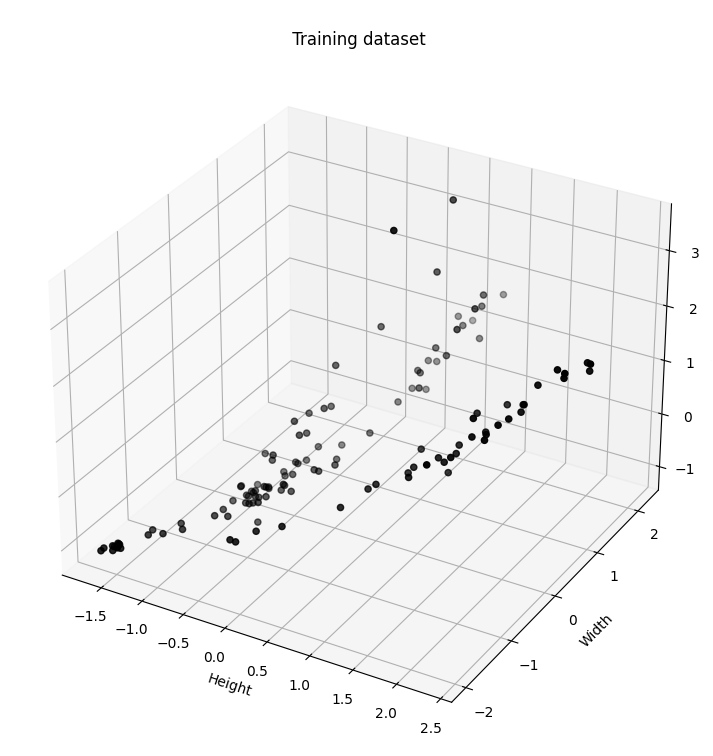

In [48]:
x = train_set.iloc[:,0:1]
y = train_set.iloc[:,1:2]
z = train_set.iloc[:,2:3]
 
# Creating figure
fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')
ax.set_xlabel('Height')
ax.set_ylabel('Width')
ax.set_zlabel('Weight')
ax.scatter3D(x, y, z, color='black');

ax.set_title('\n Training dataset')
 
# show plot
plt.show()

c:\Users\devba\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


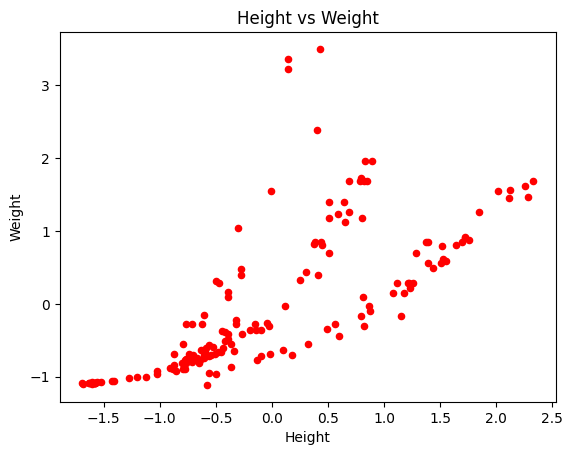

In [49]:
df.plot(kind = 'scatter', x = 'Height', y = 'Weight', color = 'red')
plt.title('Height vs Weight')
plt.show()

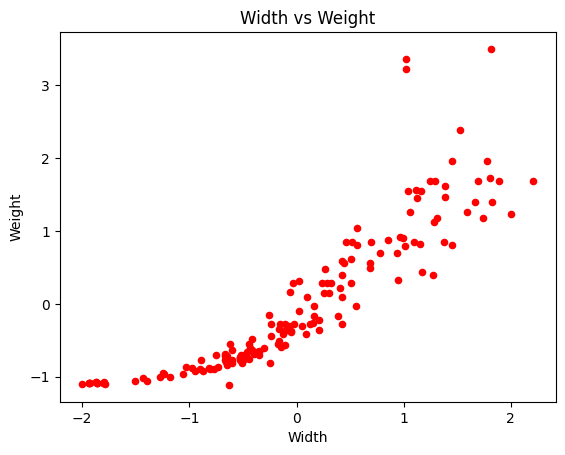

In [50]:
df.plot(kind = 'scatter', x = 'Width', y = 'Weight', color = 'red')
plt.title('Width vs Weight')
plt.show()

In [51]:
def generate_features(X, degree):
    if degree < 1:
        raise ValueError("Degree should be at least 1.")
    
    X1, X2 = X[:, 0], X[:, 1]
    n_samples = X.shape[0]
    
    # Initialize the polynomial feature matrix
    n_features = int((degree + 2) * (degree + 1) / 2)  # Number of polynomial features
    
    features = np.zeros((n_samples, n_features))
    
    # Generate polynomial features
    col_idx = 0
    for d in range(1, degree + 1):
        for i in range(d + 1):
            features[:, col_idx] = (X1 ** (d - i)) * (X2 ** i)
            col_idx += 1
    
    return features

In [52]:
def MSE(y_true, y_pred):
    squared_errors = (y_true - y_pred) ** 2
    mse = np.mean(squared_errors)
    return mse

In [53]:
def polynomial_regression_gradient_descent(x_train, y_train, x_test, y_test, degree, iterations=500, l_rate = 0.01):
    train_error_list = []
    test_error_list = []
    features_train = generate_features(x_train, degree)
    features_test = generate_features(x_test, degree)
    n_features = int((degree + 2) * (degree + 1) / 2)
    weights = np.ones(n_features)
    for i in range(iterations):
        y_train_pred = np.dot(features_train, weights)
        train_mse = MSE(y_train, y_train_pred)
        train_error_list.append(train_mse)
        y_test_pred = np.dot(features_test, weights)
        test_mse = MSE(y_test, y_test_pred)
        test_error_list.append(test_mse)
        error = y_train_pred - y_train
        gradients = np.dot(features_train.T, error)/len(y_train)
        weights = weights - l_rate*gradients
    return weights , train_error_list, test_error_list

### Using Gradient Descent

The optimal weights obtained after performing polynomial regression using gradient descent with a polynomial of degree 1 are: 
X0 = 0.20280684176394223
X1 = 0.6814113348364533
X2 = 1.0
The training error obtained with polynomial of degree 1 is: 0.20864655206391444
The testing error obtained with polynomial of degree 1 is: 0.2713841740784284


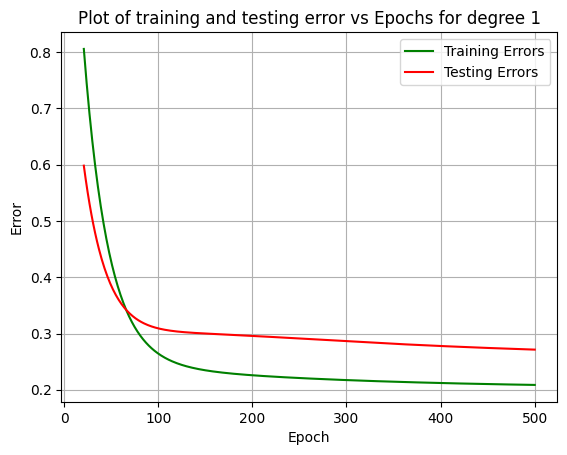



The optimal weights obtained after performing polynomial regression using gradient descent with a polynomial of degree 2 are: 
X0 = 0.3368935981659667
X1 = 0.614005851574024
X2 = -0.16884472893587502
X3 = 0.18157647538290472
X4 = 0.10732650957923016
X5 = 1.0
The training error obtained with polynomial of degree 2 is: 0.17570524221550482
The testing error obtained with polynomial of degree 2 is: 0.2421409310670534


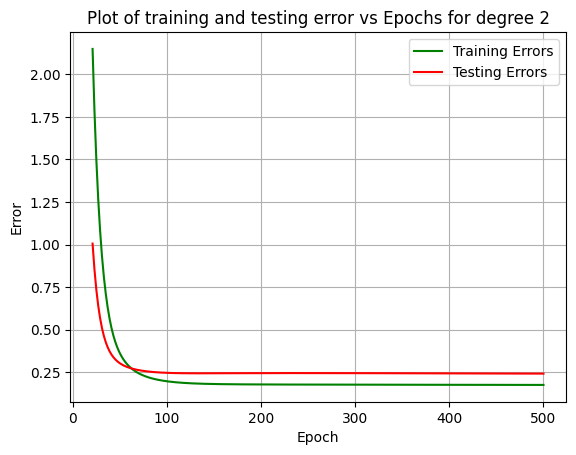



The optimal weights obtained after performing polynomial regression using gradient descent with a polynomial of degree 3 are: 
X0 = 0.46369532345638304
X1 = 0.6835101754502598
X2 = -0.04349872102919975
X3 = 0.19085874230205746
X4 = 0.10884996441740918
X5 = -0.2382746046999643
X6 = 0.19185150154856234
X7 = 0.17909485176402123
X8 = -0.14944843483200324
X9 = 1.0
The training error obtained with polynomial of degree 3 is: 0.19458847383430516
The testing error obtained with polynomial of degree 3 is: 0.2447483883687517


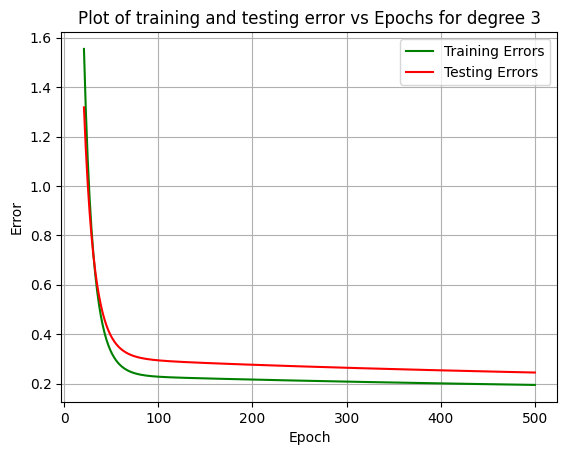



The optimal weights obtained after performing polynomial regression using gradient descent with a polynomial of degree 4 are: 
X0 = 0.39571902114078383
X1 = 0.6156955105074952
X2 = -0.015668816268294188
X3 = 0.16253836177130512
X4 = 0.18450359644458414
X5 = -0.04874036866022647
X6 = 0.14377579943007446
X7 = 0.07667244813983941
X8 = 0.004384301733446707
X9 = -0.19393927675224104
X10 = 0.11511261928556864
X11 = 0.20480193571841335
X12 = 0.05108727999375907
X13 = -0.11892911117810613
X14 = 1.0
The training error obtained with polynomial of degree 4 is: 0.2208383480522355
The testing error obtained with polynomial of degree 4 is: 0.2577441962756282


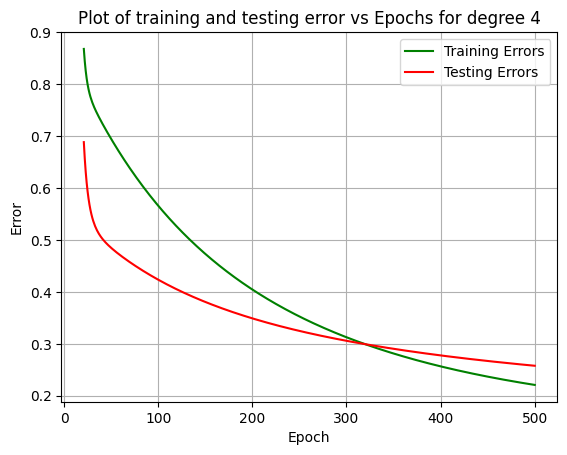



The optimal weights obtained after performing polynomial regression using gradient descent with a polynomial of degree 5 are: 
X0 = 2.415489653567631e+192
X1 = 2.0915960905988276e+192
X2 = 1.576253408315449e+192
X3 = 1.7552689341377776e+191
X4 = -4.688083510005948e+191
X5 = 8.419048971818594e+192
X6 = 6.162176671220682e+192
X7 = 5.316600426146343e+192
X8 = 5.591031512303796e+192
X9 = 9.57982047866062e+192
X10 = 3.374348516207972e+192
X11 = -3.055546302457696e+191
X12 = -2.4521526130280976e+192
X13 = -3.2093461087157076e+192
X14 = 3.405977629280364e+193
X15 = 2.2772169306608997e+193
X16 = 1.708470866043952e+193
X17 = 1.475329621255254e+193
X18 = 1.4845851089451296e+193
X19 = 1.764987711357838e+193
X20 = 1.0
The training error obtained with polynomial of degree 5 is: inf
The testing error obtained with polynomial of degree 5 is: inf


c:\Users\devba\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\devba\AppData\Local\Temp\ipykernel_14420\1307598138.py:2: RuntimeWarning: overflow encountered in square
  squared_errors = (y_true - y_pred) ** 2


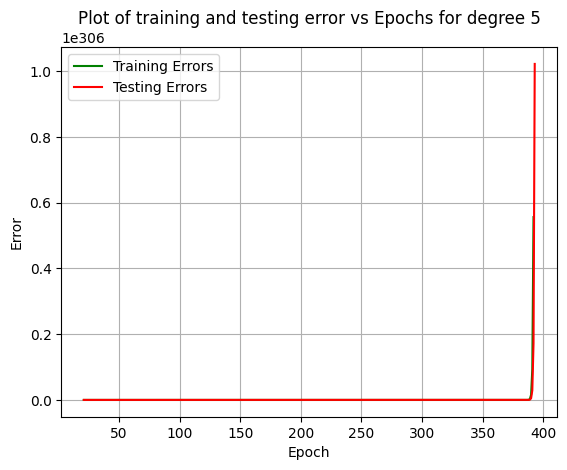



The optimal weights obtained after performing polynomial regression using gradient descent with a polynomial of degree 6 are: 
X0 = nan
X1 = nan
X2 = nan
X3 = nan
X4 = nan
X5 = nan
X6 = nan
X7 = nan
X8 = nan
X9 = nan
X10 = nan
X11 = nan
X12 = nan
X13 = nan
X14 = nan
X15 = nan
X16 = nan
X17 = nan
X18 = nan
X19 = nan
X20 = nan
X21 = nan
X22 = nan
X23 = nan
X24 = nan
X25 = nan
X26 = nan
X27 = nan
The training error obtained with polynomial of degree 6 is: nan
The testing error obtained with polynomial of degree 6 is: nan


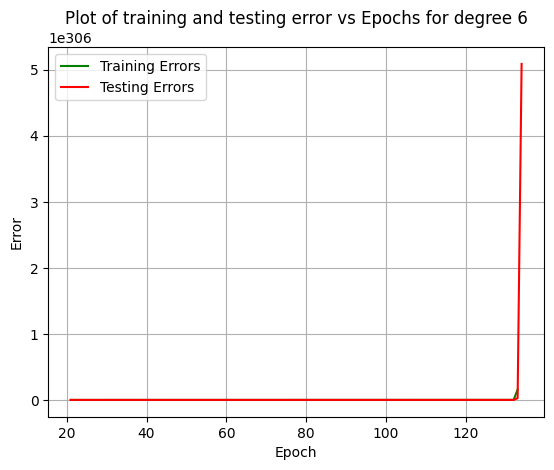



The optimal weights obtained after performing polynomial regression using gradient descent with a polynomial of degree 7 are: 
X0 = nan
X1 = nan
X2 = nan
X3 = nan
X4 = nan
X5 = nan
X6 = nan
X7 = nan
X8 = nan
X9 = nan
X10 = nan
X11 = nan
X12 = nan
X13 = nan
X14 = nan
X15 = nan
X16 = nan
X17 = nan
X18 = nan
X19 = nan
X20 = nan
X21 = nan
X22 = nan
X23 = nan
X24 = nan
X25 = nan
X26 = nan
X27 = nan
X28 = nan
X29 = nan
X30 = nan
X31 = nan
X32 = nan
X33 = nan
X34 = nan
X35 = nan
The training error obtained with polynomial of degree 7 is: nan
The testing error obtained with polynomial of degree 7 is: nan


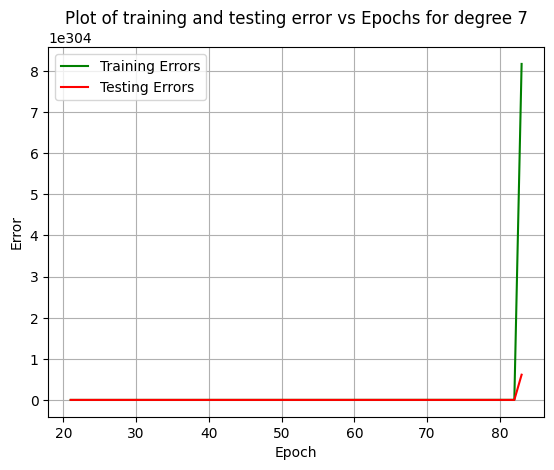



The optimal weights obtained after performing polynomial regression using gradient descent with a polynomial of degree 8 are: 
X0 = nan
X1 = nan
X2 = nan
X3 = nan
X4 = nan
X5 = nan
X6 = nan
X7 = nan
X8 = nan
X9 = nan
X10 = nan
X11 = nan
X12 = nan
X13 = nan
X14 = nan
X15 = nan
X16 = nan
X17 = nan
X18 = nan
X19 = nan
X20 = nan
X21 = nan
X22 = nan
X23 = nan
X24 = nan
X25 = nan
X26 = nan
X27 = nan
X28 = nan
X29 = nan
X30 = nan
X31 = nan
X32 = nan
X33 = nan
X34 = nan
X35 = nan
X36 = nan
X37 = nan
X38 = nan
X39 = nan
X40 = nan
X41 = nan
X42 = nan
X43 = nan
X44 = nan
The training error obtained with polynomial of degree 8 is: nan
The testing error obtained with polynomial of degree 8 is: nan


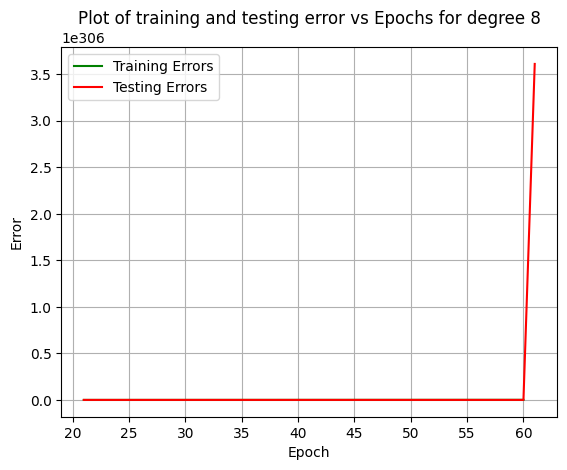



The optimal weights obtained after performing polynomial regression using gradient descent with a polynomial of degree 9 are: 
X0 = nan
X1 = nan
X2 = nan
X3 = nan
X4 = nan
X5 = nan
X6 = nan
X7 = nan
X8 = nan
X9 = nan
X10 = nan
X11 = nan
X12 = nan
X13 = nan
X14 = nan
X15 = nan
X16 = nan
X17 = nan
X18 = nan
X19 = nan
X20 = nan
X21 = nan
X22 = nan
X23 = nan
X24 = nan
X25 = nan
X26 = nan
X27 = nan
X28 = nan
X29 = nan
X30 = nan
X31 = nan
X32 = nan
X33 = nan
X34 = nan
X35 = nan
X36 = nan
X37 = nan
X38 = nan
X39 = nan
X40 = nan
X41 = nan
X42 = nan
X43 = nan
X44 = nan
X45 = nan
X46 = nan
X47 = nan
X48 = nan
X49 = nan
X50 = nan
X51 = nan
X52 = nan
X53 = nan
X54 = nan
The training error obtained with polynomial of degree 9 is: nan
The testing error obtained with polynomial of degree 9 is: nan


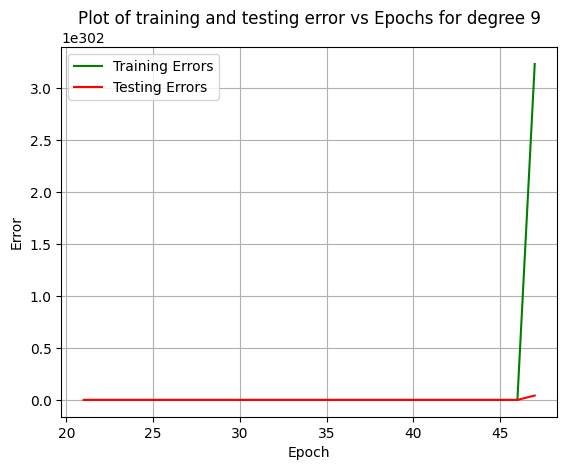

In [54]:
train_errors_gradient_descent = []
test_errors_gradient_descent = []
models_gradient_descent = []
iterations = 500
epochs = np.arange(21, iterations+1)
for i in range (1, 10):
    theta, train_errors, test_errors = polynomial_regression_gradient_descent(x_train, y_train, x_test, y_test, i, iterations)
    models_gradient_descent.append(theta)
    print("The optimal weights obtained after performing polynomial regression using gradient descent with a polynomial of degree " + str(i) + " are: ")
    for j in range (theta.size):
        print("X" + str(j) + " = " + str(theta[j]))
    train_errors_gradient_descent.append(train_errors[-1])
    test_errors_gradient_descent.append(test_errors[-1])
    print("The training error obtained with polynomial of degree " + str(i) + " is: " + str(train_errors[-1]))
    print("The testing error obtained with polynomial of degree " + str(i) + " is: " + str(test_errors[-1]))
    plt.plot(epochs, train_errors[20:], color = "green",label='Training Errors')
    plt.plot(epochs, test_errors[20:], color = "red", label='Testing Errors')
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.title('Plot of training and testing error vs Epochs for degree '+ str(i))
    plt.legend()
    plt.grid(True)
    plt.show()
    print("\n")

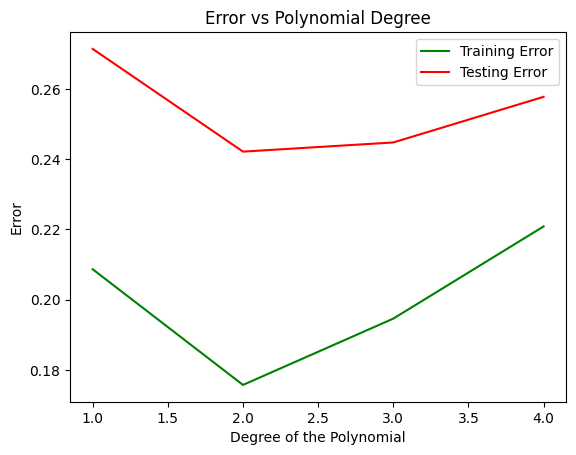

In [55]:
degree = [1, 2, 3, 4]
plt.plot(degree, train_errors_gradient_descent[0:4], color='g', label='Training Error')
plt.plot(degree, test_errors_gradient_descent[0:4], color='r', label='Testing Error')
plt.xlabel('Degree of the Polynomial') 
plt.ylabel('Error') 
plt.title('Error vs Polynomial Degree')  
plt.legend()
plt.show() 

In [56]:
def predict(x, y, params, degree):
    z = np.array([])
    for i in range (1000):
        X = np.column_stack((x[:,i], y[:, i]))
        features = generate_features(X, degree)
        column = np.dot(features, params)
        if z.size == 0:
            z = column
        else:
            z = np.column_stack((z, column))
    return z

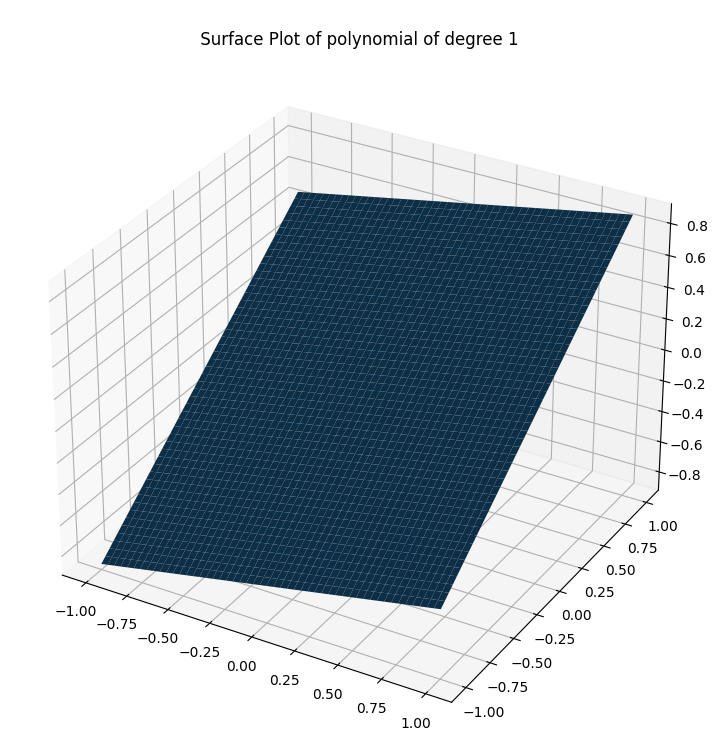

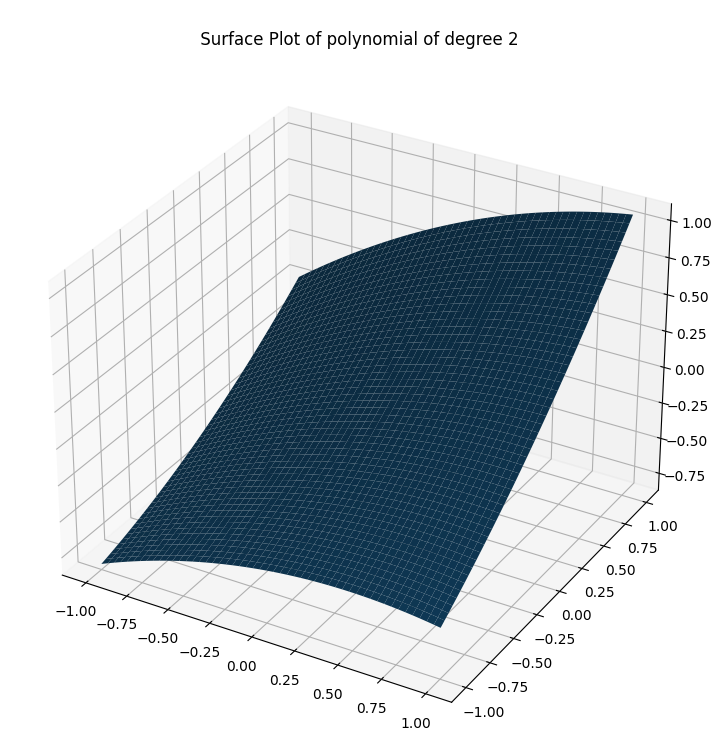

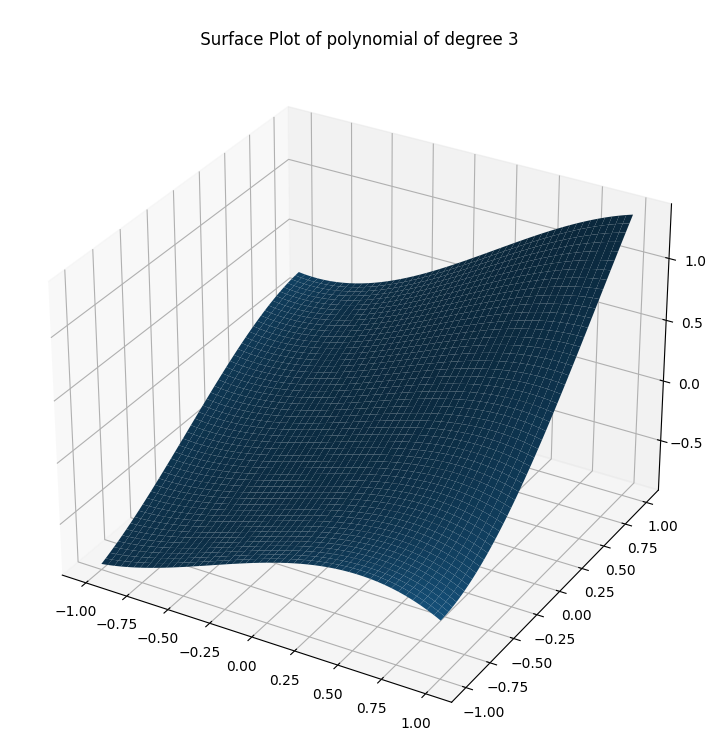

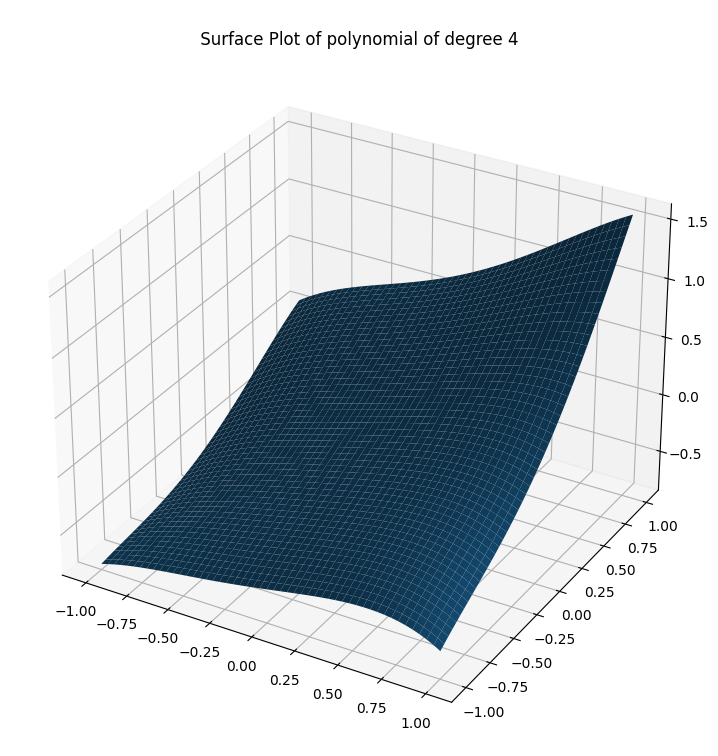

In [57]:
for i in range (4):
    opt_poly_reg_weights = models_gradient_descent[i]
    x = np.outer(np.linspace(-1, 1, 1000), np.ones(1000))
    y = x.copy().T # transpose
    z = predict(x, y, opt_poly_reg_weights, i+1)
    # Creating figure
    fig = plt.figure(figsize =(14, 9))
    ax = plt.axes(projection ='3d')

    # ax.set_xlabel('MLOGP')
    # ax.set_ylabel('RDCHI')
    # ax.set_zlabel('LC50')

    # Creating plot
    ax.plot_surface(x, y, z)
    ax.set_title('\n Surface Plot of polynomial of degree ' + str(i+1))
    # show plot
    plt.show()

#### Observation-1: Polynomials above degree 4 are overfitting - values of weights (coefficients) have blown up.
#### Observation-2: Polynomial with degree 2 is giving the least error hence and an increase in the degree of the polynomial is resulting in an increase in the training error indicating that a degree 2 polynomial is a right fit for the given dataset

In [58]:
def polynomial_regression_stochastic_gradient_descent(x_train, y_train, x_test, y_test, degree, iterations=500, l_rate = 0.01):
    train_error_list = []
    test_error_list = []
    features_train = generate_features(x_train, degree)
    features_test = generate_features(x_test, degree)
    n_features = int((degree + 2) * (degree + 1) / 2)
    weights = np.ones(n_features)
    for i in range(iterations):
        
        y_train_pred = np.dot(features_train, weights)
        train_mse = MSE(y_train, y_train_pred)
        train_error_list.append(train_mse)
        
        y_test_pred = np.dot(features_test, weights)
        test_mse = MSE(y_test, y_test_pred)
        test_error_list.append(test_mse)
        
        random_index = np.random.randint(features_train.shape[0])
        xi = features_train[random_index:random_index+1]
        yi = y_train[random_index:random_index+1] 
        prediction = np.dot(xi, weights)
        error = prediction - yi
        gradients = np.dot(xi.T, error)
        weights = weights - l_rate*gradients
        
    return weights , train_error_list, test_error_list

### Using Stochastic Gradient Descent

The optimal weights obtained after performing polynomial regression using gradient descent with a polynomial of degree 1 are: 
X0 = 0.23579469455120314
X1 = 0.7111469904558256
X2 = 1.0
The training error obtained with polynomial of degree 1 is: 0.2124848049646697
The testing error obtained with polynomial of degree 1 is: 0.266288309161355


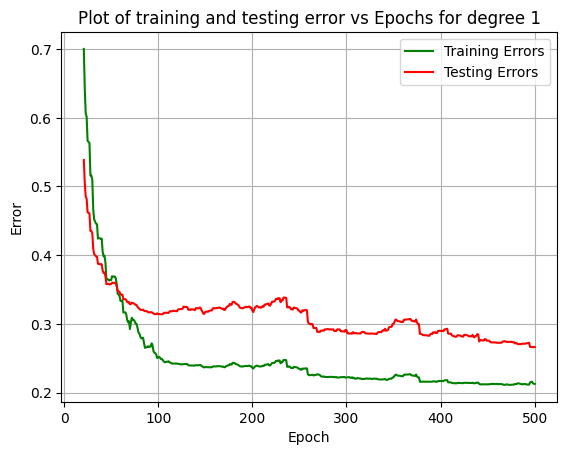



The optimal weights obtained after performing polynomial regression using gradient descent with a polynomial of degree 2 are: 
X0 = 0.3245607185179587
X1 = 0.5934876598710966
X2 = -0.1798350204189006
X3 = 0.17875447166400033
X4 = 0.10396894007344368
X5 = 1.0
The training error obtained with polynomial of degree 2 is: 0.17770339396370075
The testing error obtained with polynomial of degree 2 is: 0.2467569697607868


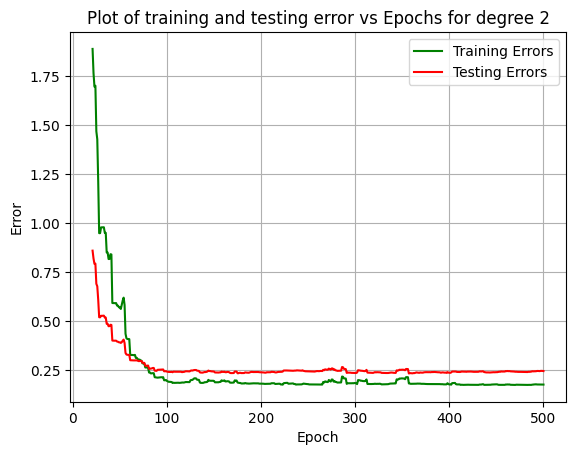



The optimal weights obtained after performing polynomial regression using gradient descent with a polynomial of degree 3 are: 
X0 = 0.45780069422624775
X1 = 0.6530372362549371
X2 = -0.05506232205119536
X3 = 0.23148942544674866
X4 = 0.08832200233526809
X5 = -0.23009287976041917
X6 = 0.22296749056945142
X7 = 0.18227781605383025
X8 = -0.18077559812361538
X9 = 1.0
The training error obtained with polynomial of degree 3 is: 0.20560978210082856
The testing error obtained with polynomial of degree 3 is: 0.25656697249388


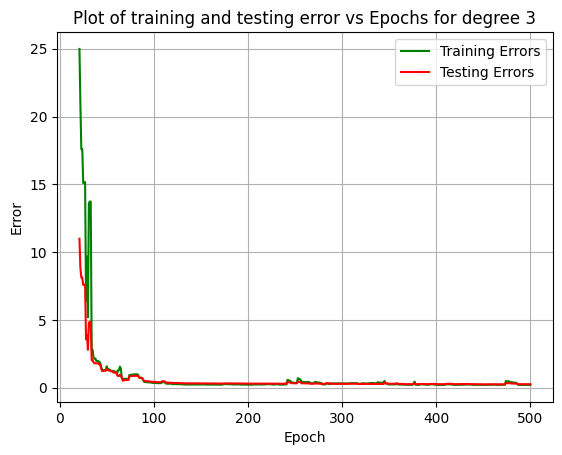



The optimal weights obtained after performing polynomial regression using gradient descent with a polynomial of degree 4 are: 
X0 = 7.261853731910573e+30
X1 = 1.7407950347053644e+30
X2 = 2.120873724410396e+31
X3 = 1.172226066540305e+31
X4 = 1.9321140281992975e+30
X5 = 4.429096011864677e+31
X6 = 2.3963110622309617e+31
X7 = 7.410372117352192e+30
X8 = -1.2566453480181226e+31
X9 = 1.1166722550792227e+32
X10 = 6.947405672183313e+31
X11 = 4.0413644315870053e+31
X12 = 1.4655615053203143e+31
X13 = -2.232223678061416e+31
X14 = 1.0
The training error obtained with polynomial of degree 4 is: 1.4282889248186485e+66
The testing error obtained with polynomial of degree 4 is: 1.7870708544815777e+65


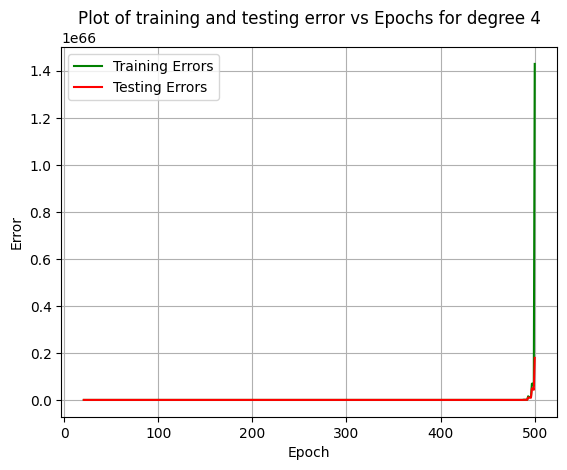



The optimal weights obtained after performing polynomial regression using gradient descent with a polynomial of degree 5 are: 
X0 = 2.2314476410811472e+70
X1 = 2.514761869896384e+70
X2 = -2.6026080563720537e+70
X3 = -2.9520992537401925e+70
X4 = -3.265037691060127e+70
X5 = 3.284733854340459e+70
X6 = 3.556346920032835e+70
X7 = 3.905589341344553e+70
X8 = 4.302892117966004e+70
X9 = -3.645744056377993e+70
X10 = -4.093734949201038e+70
X11 = -4.484364788494324e+70
X12 = -4.873131561204274e+70
X13 = -5.2822489786495624e+70
X14 = 4.330616747957199e+70
X15 = 4.544678684693069e+70
X16 = 4.8590017218932414e+70
X17 = 5.180998091423034e+70
X18 = 5.4631201075749014e+70
X19 = 5.634189205530583e+70
X20 = 1.0
The training error obtained with polynomial of degree 5 is: 7.391287732482688e+144
The testing error obtained with polynomial of degree 5 is: 5.251538738958908e+144


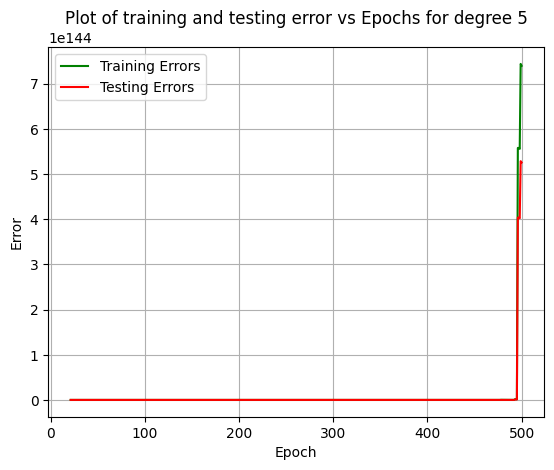



The optimal weights obtained after performing polynomial regression using gradient descent with a polynomial of degree 6 are: 
X0 = -8.416181186053376e+157
X1 = -6.350667491102046e+157
X2 = -1.276411949494802e+158
X3 = -9.161329149284229e+157
X4 = -7.625211033905406e+157
X5 = -1.8982925288027355e+158
X6 = -1.3270519923632691e+158
X7 = -1.0163006688787907e+158
X8 = -1.0074253992230312e+158
X9 = -2.8810708280347636e+158
X10 = -1.9791166093153195e+158
X11 = -1.4353203958155642e+158
X12 = -1.241339499159878e+158
X13 = -1.5560402331953086e+158
X14 = -4.341468414090021e+158
X15 = -2.953992391803881e+158
X16 = -2.0722620998305067e+158
X17 = -1.6254350289012987e+158
X18 = -1.704527967118168e+158
X19 = -2.741426110733876e+158
X20 = -6.5885772457875835e+158
X21 = -4.457675894786192e+158
X22 = -3.0681581871571487e+158
X23 = -2.2589844279351175e+158
X24 = -2.0386770453558644e+158
X25 = -2.729610448241431e+158
X26 = -5.371932469280104e+158
X27 = 1.0
The training error obtained with polynomial of 

C:\Users\devba\AppData\Local\Temp\ipykernel_14420\1307598138.py:2: RuntimeWarning: overflow encountered in square
  squared_errors = (y_true - y_pred) ** 2


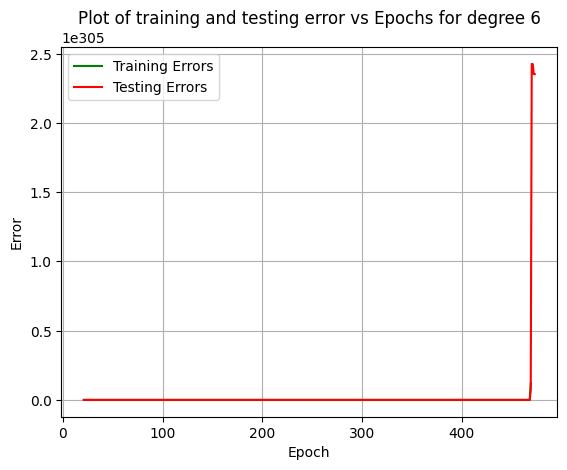



The optimal weights obtained after performing polynomial regression using gradient descent with a polynomial of degree 7 are: 
X0 = 1.6360940807815044e+191
X1 = 8.519913978980972e+190
X2 = 1.5854487759940715e+191
X3 = 1.6530508649156443e+190
X4 = -3.680137480743743e+190
X5 = 3.947292732030028e+191
X6 = 1.8079872438553425e+191
X7 = 1.1409910028659495e+191
X8 = 9.865081975458631e+190
X9 = 4.663459841271828e+191
X10 = 9.545255536776917e+190
X11 = -3.804610075709755e+190
X12 = -9.146250207969952e+190
X13 = -1.1883194952342114e+191
X14 = 9.727716829151312e+191
X15 = 3.9883217285176436e+191
X16 = 2.1561878391630816e+191
X17 = 1.666000168630181e+191
X18 = 1.642086993960107e+191
X19 = 1.789464853042907e+191
X20 = 1.2829676081275903e+192
X21 = 3.174669895448447e+191
X22 = -1.6999198501422828e+190
X23 = -1.396611970567491e+191
X24 = -1.936723767648448e+191
X25 = -2.2757850939401235e+191
X26 = -2.576388241546622e+191
X27 = 2.393448105436512e+192
X28 = 8.834578057371991e+191
X29 = 4.034684073006

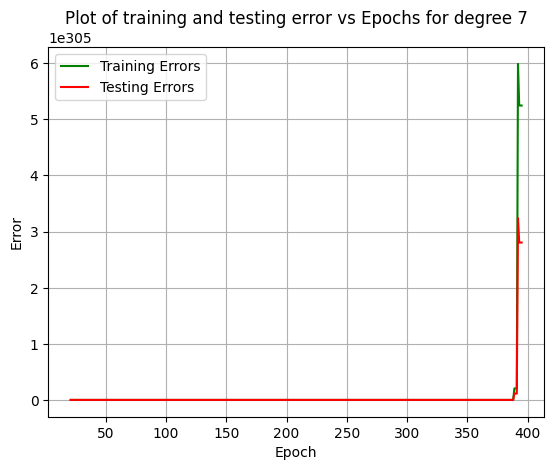



The optimal weights obtained after performing polynomial regression using gradient descent with a polynomial of degree 8 are: 
X0 = -8.710792890143617e+299
X1 = -2.2746001737079396e+300
X2 = -7.36601035430475e+299
X3 = -1.92122282735463e+300
X4 = -5.0125639528091804e+300
X5 = -6.238258899787887e+299
X6 = -1.6264138513996787e+300
X7 = -4.2407933103962996e+300
X8 = -1.1059494646548016e+301
X9 = -5.2860354152414034e+299
X10 = -1.3779510365586104e+300
X11 = -3.592154261045398e+300
X12 = -9.364872847649832e+300
X13 = -2.4416708155971536e+301
X14 = -4.47996201134293e+299
X15 = -1.1677708100379993e+300
X16 = -3.044010853215408e+300
X17 = -7.934937376024896e+300
X18 = -2.0684937692376737e+301
X19 = -5.392437394276941e+301
X20 = -3.7971508348278984e+299
X21 = -9.897594953511833e+299
X22 = -2.5799112570294417e+300
X23 = -6.724865930876709e+300
X24 = -1.7529420497807953e+301
X25 = -4.569395794683808e+301
X26 = -1.1911343897614712e+302
X27 = -3.218338047004983e+299
X28 = -8.388959204160833e+299


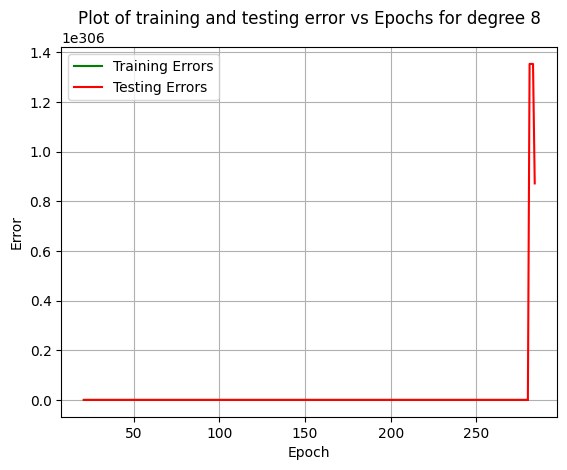



The optimal weights obtained after performing polynomial regression using gradient descent with a polynomial of degree 9 are: 
X0 = nan
X1 = nan
X2 = nan
X3 = nan
X4 = nan
X5 = nan
X6 = nan
X7 = nan
X8 = nan
X9 = nan
X10 = nan
X11 = nan
X12 = nan
X13 = nan
X14 = nan
X15 = nan
X16 = nan
X17 = nan
X18 = nan
X19 = nan
X20 = nan
X21 = nan
X22 = nan
X23 = nan
X24 = nan
X25 = nan
X26 = nan
X27 = nan
X28 = nan
X29 = nan
X30 = nan
X31 = nan
X32 = nan
X33 = nan
X34 = nan
X35 = nan
X36 = nan
X37 = nan
X38 = nan
X39 = nan
X40 = nan
X41 = nan
X42 = nan
X43 = nan
X44 = nan
X45 = nan
X46 = nan
X47 = nan
X48 = nan
X49 = nan
X50 = nan
X51 = nan
X52 = nan
X53 = nan
X54 = nan
The training error obtained with polynomial of degree 9 is: nan
The testing error obtained with polynomial of degree 9 is: nan


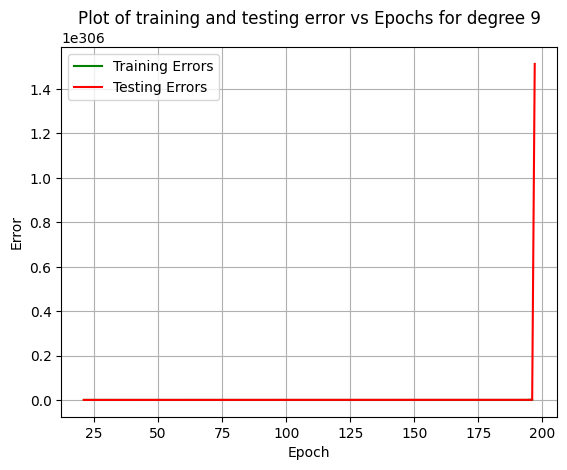

In [59]:
train_errors_stochastic_gradient_descent = []
test_errors_stochastic_gradient_descent = []
models_stochastic_gradient_descent = []
iterations = 500
epochs = np.arange(21, iterations+1)
for i in range (1, 10):
    theta, train_errors, test_errors = polynomial_regression_stochastic_gradient_descent(x_train, y_train, x_test, y_test, i, iterations)
    models_stochastic_gradient_descent.append(theta)
    print("The optimal weights obtained after performing polynomial regression using gradient descent with a polynomial of degree " + str(i) + " are: ")
    for j in range (theta.size):
        print("X" + str(j) + " = " + str(theta[j]))
    train_errors_stochastic_gradient_descent.append(train_errors[-1])
    test_errors_stochastic_gradient_descent.append(test_errors[-1])
    print("The training error obtained with polynomial of degree " + str(i) + " is: " + str(train_errors[-1]))
    print("The testing error obtained with polynomial of degree " + str(i) + " is: " + str(test_errors[-1]))
    plt.plot(epochs, train_errors[20:], color = "green",label='Training Errors')
    plt.plot(epochs, test_errors[20:], color = "red", label='Testing Errors')
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.title('Plot of training and testing error vs Epochs for degree '+ str(i))
    plt.legend()
    plt.grid(True)
    plt.show()
    print("\n")

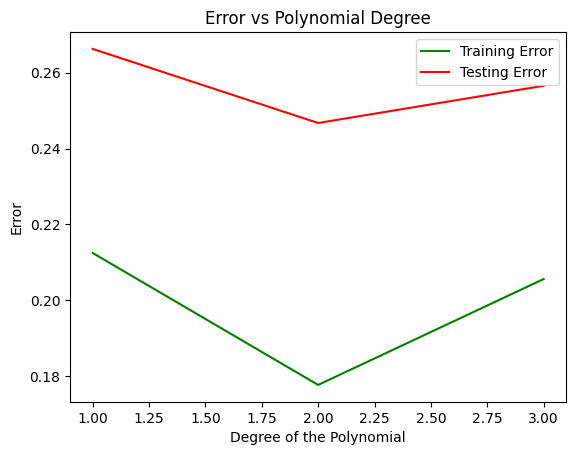

In [60]:
degree = [1, 2, 3]
plt.plot(degree, train_errors_stochastic_gradient_descent[0:3], color='g', label='Training Error')
plt.plot(degree, test_errors_stochastic_gradient_descent[0:3], color='r', label='Testing Error')
plt.xlabel('Degree of the Polynomial') 
plt.ylabel('Error') 
plt.title('Error vs Polynomial Degree')  
plt.legend()
plt.show() 

#### Observations: Stochastic gradient descent suggests a degree 2 polynomial as well

### Regularization

In [61]:
def regularization_penalty(params, q, lamda):
    if q == 0.5:
        return lamda*(np.reciprocal(np.sqrt(abs(params))) / 4)
    elif q == 1:
        sign = np.sign(params)
        return (lamda * sign)/2
    elif q == 2:
        return lamda * params
    elif q == 4:
        return 2 * lamda * (params ** 3)

In [62]:
def polynomial_regression_gradient_descent_with_regularization(x_train, y_train, x_test, y_test, degree, q, lamda=0.5, iterations=500, l_rate = 0.01):
    train_error_list = []
    test_error_list = []
    features_train = generate_features(x_train, degree)
    features_test = generate_features(x_test, degree)
    n_features = int((degree + 2) * (degree + 1) / 2)
    weights = np.ones(n_features)
    for i in range(iterations):
        y_train_pred = np.dot(features_train, weights)
        train_mse = MSE(y_train, y_train_pred)
        train_error_list.append(train_mse)
        y_test_pred = np.dot(features_test, weights)
        test_mse = MSE(y_test, y_test_pred)
        test_error_list.append(test_mse)
        error = y_train_pred - y_train
        gradients = np.dot(features_train.T, error)/len(y_train) + regularization_penalty(weights, q, lamda)
        weights = weights - l_rate*gradients
    return weights , train_error_list, test_error_list

In [63]:
def polynomial_regression_stochastic_gradient_descent_with_regularization(x_train, y_train, x_test, y_test, degree, q, lamda=0.5, iterations=500, l_rate = 0.01):
    train_error_list = []
    test_error_list = []
    features_train = generate_features(x_train, degree)
    features_test = generate_features(x_test, degree)
    n_features = int((degree + 2) * (degree + 1) / 2)
    weights = np.ones(n_features)
    for i in range(iterations):
        
        y_train_pred = np.dot(features_train, weights)
        train_mse = MSE(y_train, y_train_pred)
        train_error_list.append(train_mse)
        
        y_test_pred = np.dot(features_test, weights)
        test_mse = MSE(y_test, y_test_pred)
        test_error_list.append(test_mse)
        
        random_index = np.random.randint(features_train.shape[0])
        xi = features_train[random_index:random_index+1]
        yi = y_train[random_index:random_index+1] 
        prediction = np.dot(xi, weights)
        error = prediction - yi
        gradients = np.dot(xi.T, error) + regularization_penalty(weights, q, lamda)
        weights = weights - l_rate*gradients
        
    return weights , train_error_list, test_error_list

Optimal weights obtained when the regularization power = 0.5 are: 
[-0.15445817  0.80552433 -0.07584248  0.11851556 -0.09908232  0.15893196]
The training error obtained is: 0.320033764285057
The testing error obtained is: 0.3271278225129126


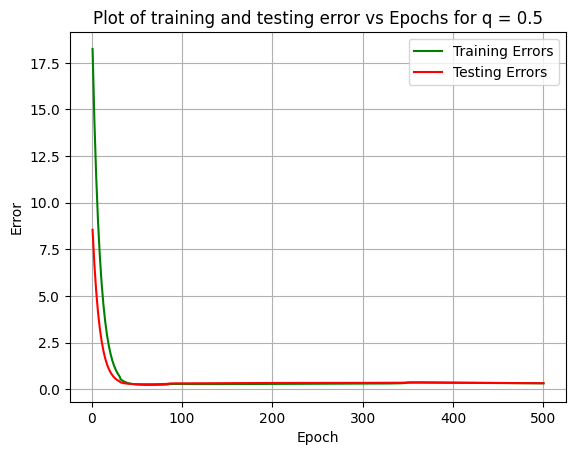

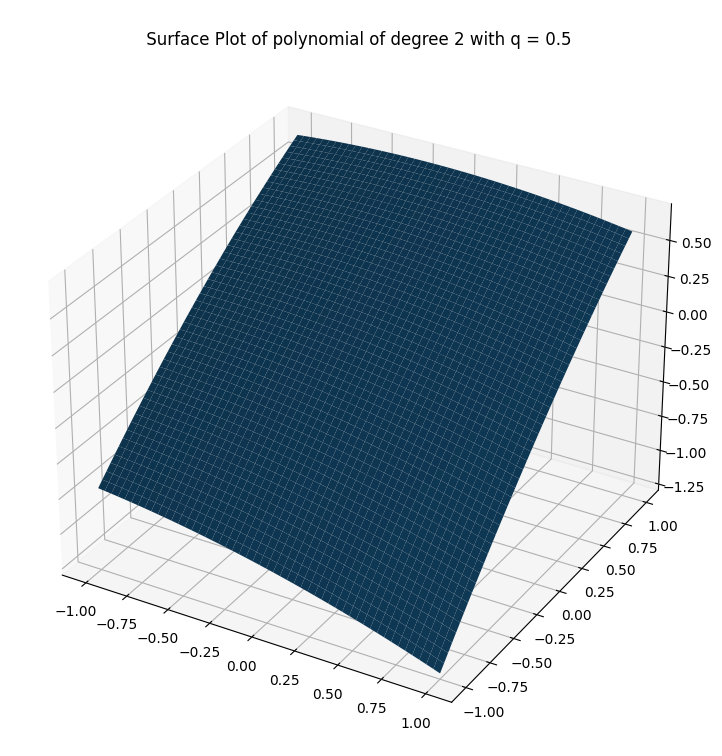



Optimal weights obtained when the regularization power = 1 are: 
[7.11434052e-02 5.49656402e-01 2.78574914e-03 1.04430850e-03
 9.38546016e-03 1.02478789e-14]
The training error obtained is: 0.2675923175960529
The testing error obtained is: 0.3472541374022521


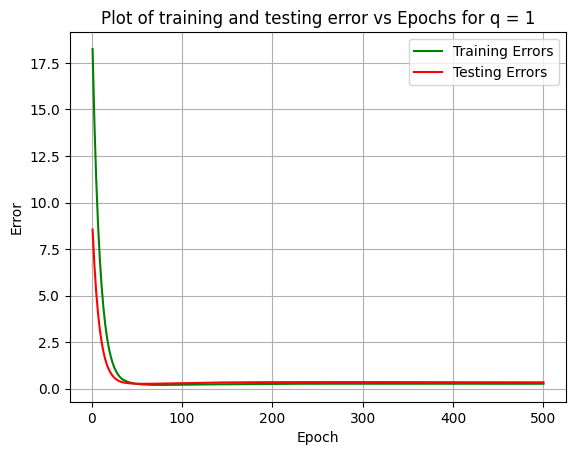

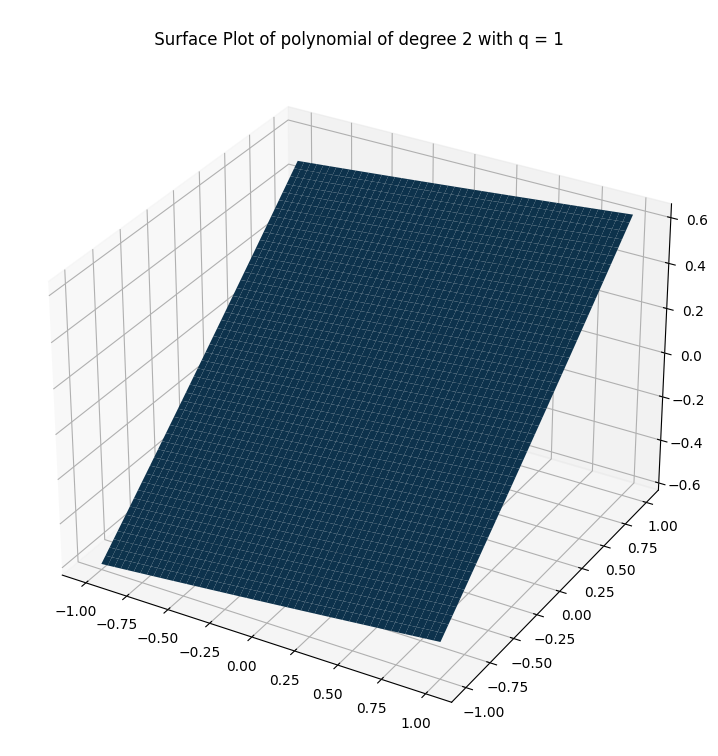



Optimal weights obtained when the regularization power = 2 are: 
[ 0.27636424  0.43402566 -0.02856852 -0.00075557  0.11771498  0.08157186]
The training error obtained is: 0.22291647751179103
The testing error obtained is: 0.3269083213300158


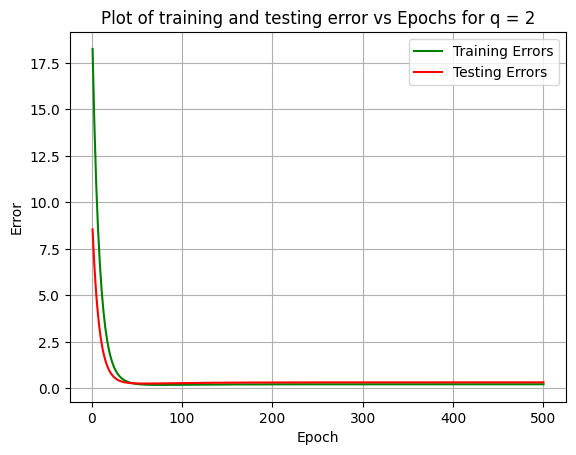

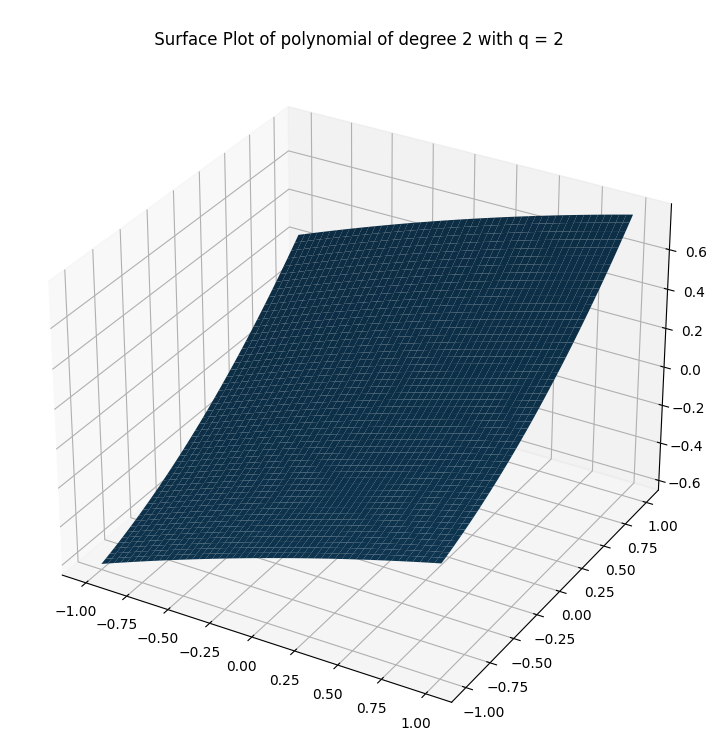



Optimal weights obtained when the regularization power = 4 are: 
[ 0.37695166  0.47478975 -0.13731685  0.09253658  0.14896428  0.30101736]
The training error obtained is: 0.18930690065009056
The testing error obtained is: 0.2772322926293249


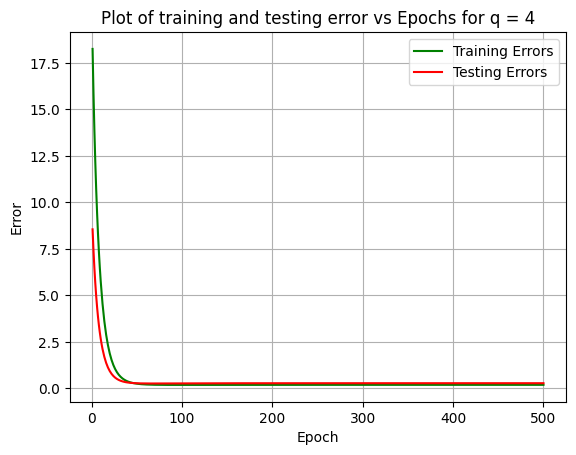

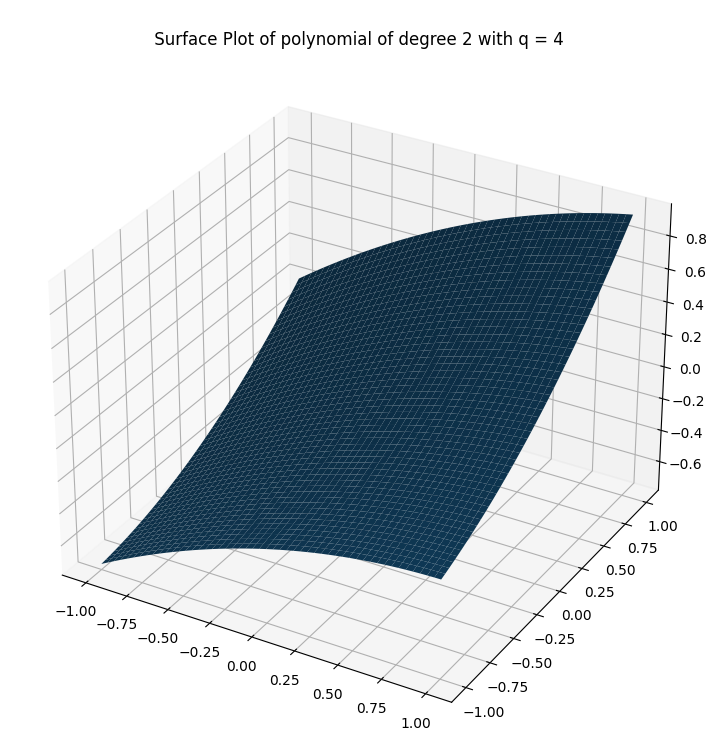

In [64]:
regularization_powers = [0.5, 1, 2, 4]
epochs = np.arange(1, 501)
for i in range (4):
    weights, train_errors, test_errors = polynomial_regression_gradient_descent_with_regularization(x_train, y_train, x_test, y_test, 2, regularization_powers[i])
    print("Optimal weights obtained when the regularization power = " + str(regularization_powers[i]) + " are: ")
    print(weights)
    print("The training error obtained is: " + str(train_errors[-1]))
    print("The testing error obtained is: " + str(test_errors[-1]))
    plt.plot(epochs, train_errors, color = "green",label='Training Errors')
    plt.plot(epochs, test_errors, color = "red", label='Testing Errors')
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.title('Plot of training and testing error vs Epochs for q = '+ str(regularization_powers[i]))
    plt.legend()
    plt.grid(True)
    plt.show()
    
    x = np.outer(np.linspace(-1, 1, 1000), np.ones(1000))
    y = x.copy().T # transpose
    z = predict(x, y, weights, 2)
    # Creating figure
    fig = plt.figure(figsize =(14, 9))
    ax = plt.axes(projection ='3d')

    # ax.set_xlabel('MLOGP')
    # ax.set_ylabel('RDCHI')
    # ax.set_zlabel('LC50')

    # Creating plot
    ax.plot_surface(x, y, z)
    ax.set_title('\n Surface Plot of polynomial of degree 2 with q = ' + str(regularization_powers[i]))
    # show plot
    plt.show()
    print("\n")

Optimal weights obtained when the regularization power = 0.5 are: 
[ 0.17175759  0.52271874 -0.10936781 -0.16521454  0.21471324  0.15893196]
The training error obtained is: 0.34611796521488825
The testing error obtained is: 0.33286820305293907


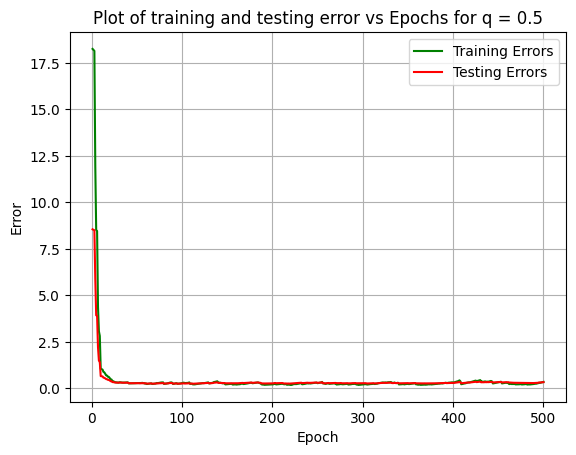

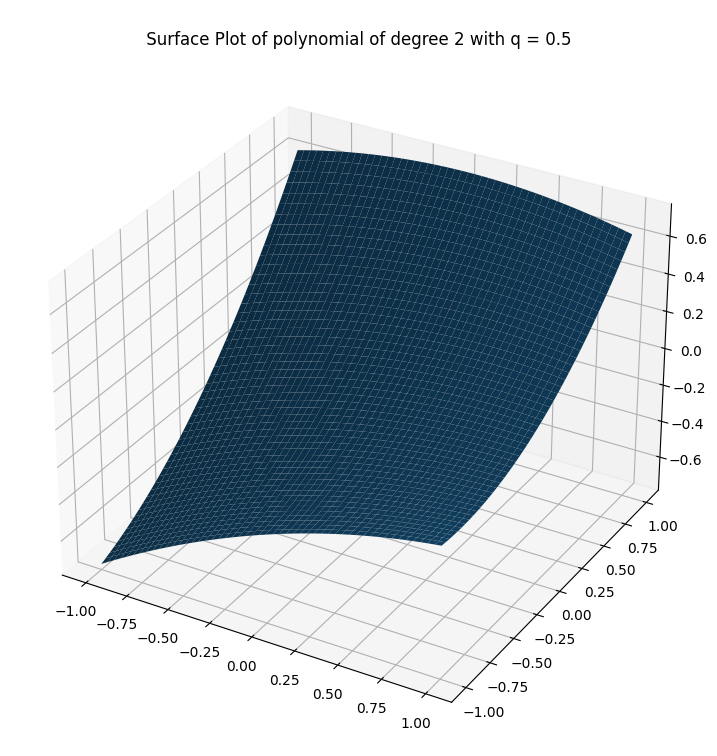





Optimal weights obtained when the regularization power = 1 are: 
[ 4.53285927e-02  5.18094830e-01 -3.94669552e-04 -1.00216515e-03
 -7.71312920e-04  1.02478789e-14]
The training error obtained is: 0.30793626634069526
The testing error obtained is: 0.3787028482269611


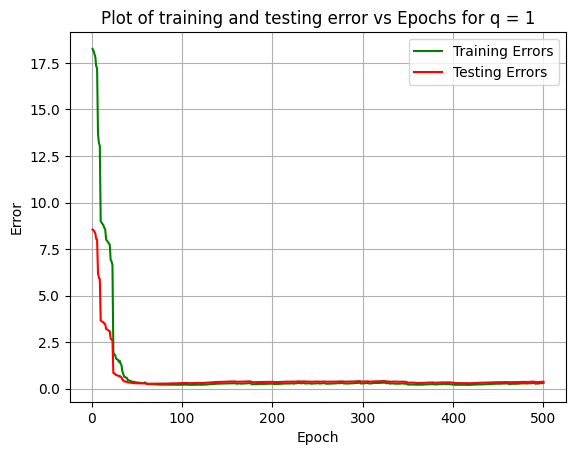

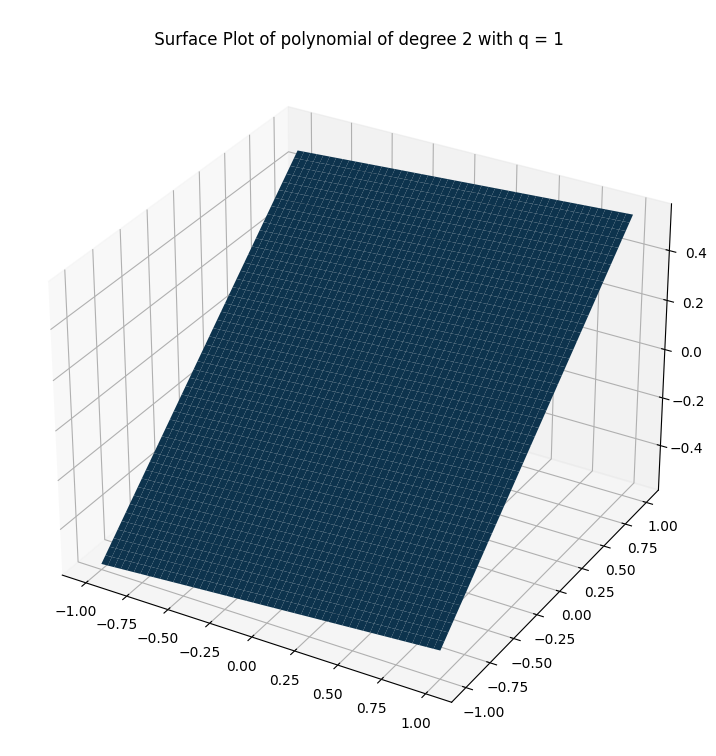





Optimal weights obtained when the regularization power = 2 are: 
[ 0.24965535  0.44910479 -0.03263301  0.002669    0.16154222  0.08157186]
The training error obtained is: 0.22292373256388617
The testing error obtained is: 0.3255288651377784


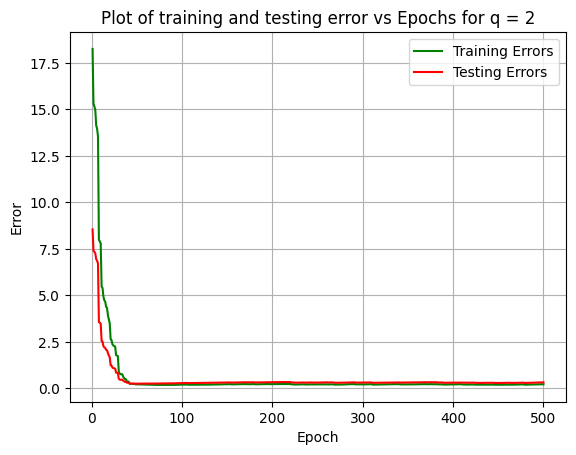

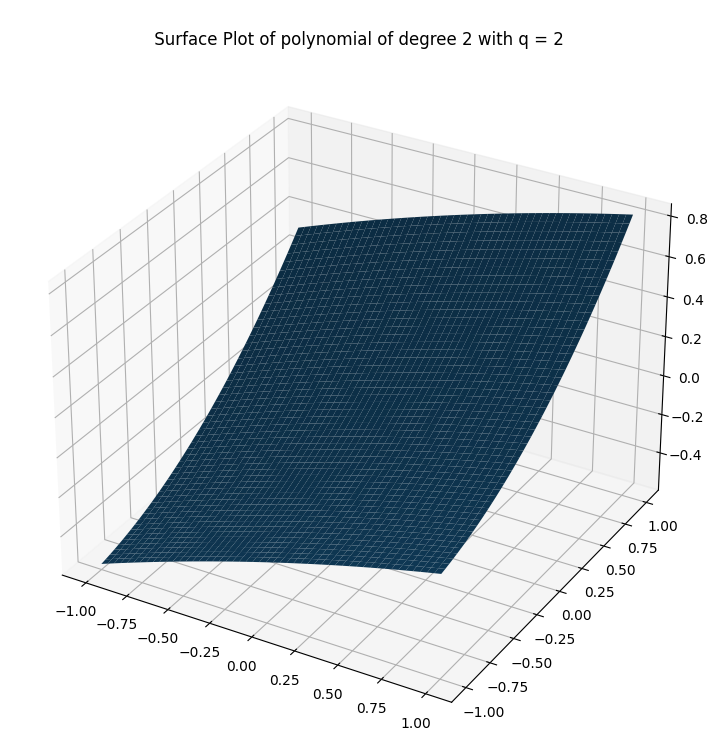





Optimal weights obtained when the regularization power = 4 are: 
[ 0.36929251  0.46819535 -0.13152732  0.11057934  0.09972847  0.30101736]
The training error obtained is: 0.19173149950302193
The testing error obtained is: 0.2808005405354435


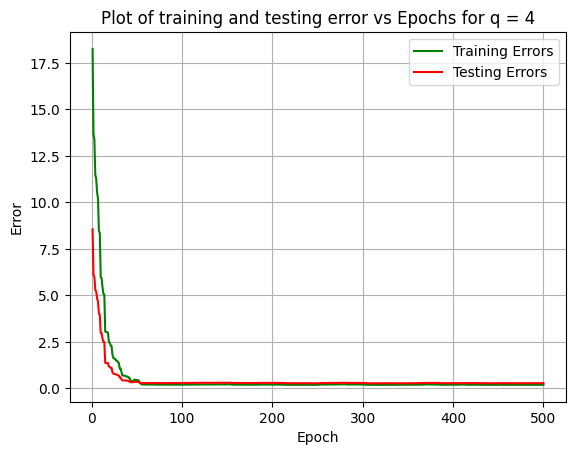

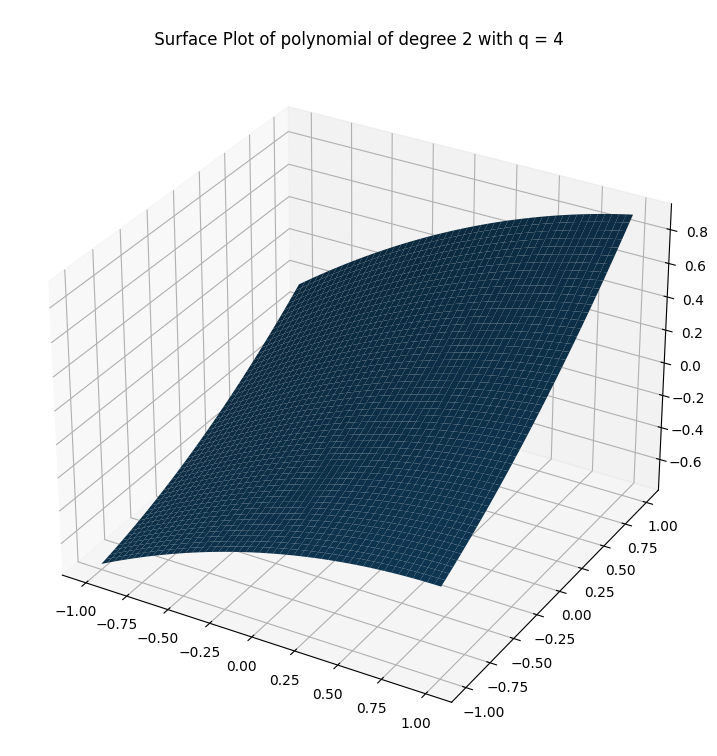

In [65]:
regularization_powers = [0.5, 1, 2, 4]
epochs = np.arange(1, 501)
for i in range (4):
    weights, train_errors, test_errors = polynomial_regression_stochastic_gradient_descent_with_regularization(x_train, y_train, x_test, y_test, 2, regularization_powers[i])
    print("Optimal weights obtained when the regularization power = " + str(regularization_powers[i]) + " are: ")
    print(weights)
    print("The training error obtained is: " + str(train_errors[-1]))
    print("The testing error obtained is: " + str(test_errors[-1]))
    plt.plot(epochs, train_errors, color = "green",label='Training Errors')
    plt.plot(epochs, test_errors, color = "red", label='Testing Errors')
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.title('Plot of training and testing error vs Epochs for q = '+ str(regularization_powers[i]))
    plt.legend()
    plt.grid(True)
    plt.show()
    
    x = np.outer(np.linspace(-1, 1, 1000), np.ones(1000))
    y = x.copy().T # transpose
    z = predict(x, y, weights, 2)
    # Creating figure
    fig = plt.figure(figsize =(14, 9))
    ax = plt.axes(projection ='3d')

    # ax.set_xlabel('MLOGP')
    # ax.set_ylabel('RDCHI')
    # ax.set_zlabel('LC50')

    # Creating plot
    ax.plot_surface(x, y, z)
    ax.set_title('\n Surface Plot of polynomial of degree 2 with q = ' + str(regularization_powers[i]))
    # show plot
    plt.show()
    print("\n")
    print("\n")